In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [ ]:
gjs = pd.read_csv('job_skills.csv', index_col=None)
gjs.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [ ]:
gjs.shape

(1250, 7)

In [ ]:
gjs.isnull().any()

Company                     False
Title                       False
Category                    False
Location                    False
Responsibilities             True
Minimum Qualifications       True
Preferred Qualifications     True
dtype: bool

In [ ]:
#Check for dupicate values
#sum(gjs.duplicated())

In [ ]:
gjs.columns

Index(['Company', 'Title', 'Category', 'Location', 'Responsibilities',
       'Minimum Qualifications', 'Preferred Qualifications'],
      dtype='object')

In [ ]:
gjs.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1250,1250,1250,1250,1235,1236,1236
unique,2,794,23,92,801,807,821
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,"Previous internship experience in Sales, Adver..."
freq,1227,35,168,190,33,32,32


In [ ]:
gjs.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [ ]:
# We are to use 'Location', 'Responsibilities', 'Minimum Qualifications' and 'Preferred Qualifications' 
# to predict the category of the job posting. 
# So we remove three irrelevant columns
gjs.drop(['Company', 'Title', 'Location'], inplace=True, axis=1)
gjs.head()
#gjs = gjs[:20]
gjs

,Category,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Program Management,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Manufacturing & Supply Chain,Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Technical Solutions,Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Developer Relations,"Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Program Management,Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...
...,...,...,...,...
1245,Real Estate & Workplace Services,Develop protocols and practices to assess and ...,BA/BS degree or equivalent practical experienc...,Investigative or Interview certification throu...
1246,Real Estate & Workplace Services,Manage the daily operations of the security ve...,BA/BS degree or equivalent practical experienc...,Master’s degree.\nProficient in the use of com...
1247,Real Estate & Workplace Services,Collaborate with functional teams; plan and ma...,BA/BS degree or equivalent practical experienc...,Experience managing outsourced facilities serv...
1248,Real Estate & Workplace Services,Partner closely with and offer guidance and co...,BA/BS degree or equivalent practical experienc...,Experience working on international programs.\...


In [ ]:
# Extract the unique categories
categories = pd.Series(gjs['Category']).unique()
print("unique categories: ", categories)
print("total categories: ", len(categories))

unique categories:  ['Program Management' 'Manufacturing & Supply Chain' 'Technical Solutions'
 'Developer Relations' 'Hardware Engineering' 'Partnerships'
 'Product & Customer Support' 'Software Engineering'
 'Data Center & Network' 'Business Strategy' 'Technical Writing'
 'Technical Infrastructure' 'IT & Data Management'
 'Marketing & Communications' 'Network Engineering'
 'Sales & Account Management' 'Sales Operations' 'Finance'
 'Legal & Government Relations' 'Administrative'
 'User Experience & Design' 'People Operations'
 'Real Estate & Workplace Services']
total categories:  23


In [ ]:
# replace the categories with abbrevation
categories_short = ['pm', 'msc', 'ts', 'dr', 'he', 'ps', 'pcs', 'se', 'dcn', 'bs', 'tw', 'ti',
                    'it', 'mc', 'ne', 'sam', 'so', 'fi', 'lgr', 'admin', 'ues', 'po', 'rw']

print("unique categories(short): ", categories_short)
print("total categories(short): ", len(categories))

for c, s in zip(categories, categories_short):
    # convert category to index (which will be used as labels when doing GaussianNB())
    gjs['Category'] = gjs['Category'].replace(c, categories_short.index(s))
    
gjs

unique categories(short):  ['pm', 'msc', 'ts', 'dr', 'he', 'ps', 'pcs', 'se', 'dcn', 'bs', 'tw', 'ti', 'it', 'mc', 'ne', 'sam', 'so', 'fi', 'lgr', 'admin', 'ues', 'po', 'rw']
total categories(short):  23


,Category,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,0,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,1,Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,2,Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,3,"Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,0,Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...
...,...,...,...,...
1245,22,Develop protocols and practices to assess and ...,BA/BS degree or equivalent practical experienc...,Investigative or Interview certification throu...
1246,22,Manage the daily operations of the security ve...,BA/BS degree or equivalent practical experienc...,Master’s degree.\nProficient in the use of com...
1247,22,Collaborate with functional teams; plan and ma...,BA/BS degree or equivalent practical experienc...,Experience managing outsourced facilities serv...
1248,22,Partner closely with and offer guidance and co...,BA/BS degree or equivalent practical experienc...,Experience working on international programs.\...


In [ ]:
import re # Load the regular expression library
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words

In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['could','would'])
nltk.download('words')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miken\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\miken\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
# clean_text is used to pre-process text
def clean_text(doc):#
    # Remove punctuation, digits etc using regex
    doc = str(doc)
    doc = doc.lower()
    txt = lambda x: re.sub('[,\.*;+!-?|\d+]', '', x)
    doc = txt(doc)
    return doc

In [ ]:
gjs['Cleaned_Responsibilities'] = gjs['Responsibilities'].map(lambda x: clean_text(x))
gjs['Cleaned_MinQualifications'] = gjs['Minimum Qualifications'].map(lambda x: clean_text(x))
gjs['Cleaned_PreQualifications'] = gjs['Preferred Qualifications'].map(lambda x: clean_text(x))
gjs.head()

,Category,Responsibilities,Minimum Qualifications,Preferred Qualifications,Cleaned_Responsibilities,Cleaned_MinQualifications,Cleaned_PreQualifications
0,0,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,shape shepherd ship and show technical program...,babs degree or equivalent practical experience...,experience in the business technology market a...
1,1,Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",drive crossfunctional activities in the supply...,bs degree in an engineering discipline or equi...,bsee bsme or bsie degree\nexperience of using ...
2,2,Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,collect and analyze data to draw insight and i...,bachelor’s degree in business economics statis...,experience partnering or consulting crossfunct...
3,3,"Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",work oneonone with the top android ios and web...,babs degree in computer science or equivalent ...,experience as a software developer architect t...
4,0,Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,plan requirements with internal customers\npro...,babs degree or equivalent practical experience...,cts certification\nexperience in the construct...


In [ ]:
from nltk.tokenize import TreebankWordTokenizer

# used to check and remove non-english words
all_words = set(nltk.corpus.words.words())
len(all_words)

tokenizer = TreebankWordTokenizer()

# remove short, stop words and non-english words
def remove_unwanted_words(words):
    doc = [word for word in words if word not in stop_words and word in all_words]        
    doc = [x for x in doc if len(x) > 2]
    doc = list(set(doc))
    return doc

gjs['Tokenized_Responsibilities'] = gjs['Cleaned_Responsibilities'].map(lambda x: tokenizer.tokenize(x))
gjs['Tokenized_MinQualifications'] = gjs['Cleaned_MinQualifications'].map(lambda x: tokenizer.tokenize(x))
gjs['Tokenized_PreQualifications'] = gjs['Cleaned_PreQualifications'].map(lambda x: tokenizer.tokenize(x))

gjs['Tokenized_Responsibilities'] = gjs['Tokenized_Responsibilities'].map(lambda x: remove_unwanted_words(x))
gjs['Tokenized_MinQualifications'] = gjs['Tokenized_MinQualifications'].map(lambda x: remove_unwanted_words(x))
gjs['Tokenized_PreQualifications'] = gjs['Tokenized_PreQualifications'].map(lambda x: remove_unwanted_words(x))

In [ ]:
!pip install wordcloud 

In [ ]:
gjs.head()

,Category,Responsibilities,Minimum Qualifications,Preferred Qualifications,Cleaned_Responsibilities,Cleaned_MinQualifications,Cleaned_PreQualifications,Tokenized_Responsibilities,Tokenized_MinQualifications,Tokenized_PreQualifications
0,0,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,shape shepherd ship and show technical program...,babs degree or equivalent practical experience...,experience in the business technology market a...,"[regular, transparent, professional, ship, fee...","[practical, project, cloud, equivalent, degree...","[pressure, technology, vision, successful, man..."
1,1,Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",drive crossfunctional activities in the supply...,bs degree in an engineering discipline or equi...,bsee bsme or bsie degree\nexperience of using ...,"[standard, chain, readiness, process, validati...","[practical, working, design, mandarin, testing...","[self, process, design, distribution, analysis..."
2,2,Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,collect and analyze data to draw insight and i...,bachelor’s degree in business economics statis...,experience partnering or consulting crossfunct...,"[draw, gather, collaboration, delivery, implem...","[practical, modeling, analysis, large, year, w...","[presentation, query, language, ability, stron..."
3,3,"Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",work oneonone with the top android ios and web...,babs degree in computer science or equivalent ...,experience as a software developer architect t...,"[regular, design, exciting, change, source, so...","[practical, android, working, one, computer, d...","[third, web, technology, working, internal, ad..."
4,0,Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,plan requirements with internal customers\npro...,babs degree or equivalent practical experience...,cts certification\nexperience in the construct...,"[agreed, entire, process, manager, understand,...","[practical, global, defined, system, video, de...","[excellent, project, ability, relevance, acros..."


In [ ]:
gjs['Tokenized_JD'] = gjs['Tokenized_Responsibilities']+gjs['Tokenized_MinQualifications']+gjs['Tokenized_PreQualifications']
gjs.head()

,Category,Responsibilities,Minimum Qualifications,Preferred Qualifications,Cleaned_Responsibilities,Cleaned_MinQualifications,Cleaned_PreQualifications,Tokenized_Responsibilities,Tokenized_MinQualifications,Tokenized_PreQualifications,Tokenized_JD
0,0,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,shape shepherd ship and show technical program...,babs degree or equivalent practical experience...,experience in the business technology market a...,"[regular, transparent, professional, ship, fee...","[practical, project, cloud, equivalent, degree...","[pressure, technology, vision, successful, man...","[regular, transparent, professional, ship, fee..."
1,1,Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",drive crossfunctional activities in the supply...,bs degree in an engineering discipline or equi...,bsee bsme or bsie degree\nexperience of using ...,"[standard, chain, readiness, process, validati...","[practical, working, design, mandarin, testing...","[self, process, design, distribution, analysis...","[standard, chain, readiness, process, validati..."
2,2,Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,collect and analyze data to draw insight and i...,bachelor’s degree in business economics statis...,experience partnering or consulting crossfunct...,"[draw, gather, collaboration, delivery, implem...","[practical, modeling, analysis, large, year, w...","[presentation, query, language, ability, stron...","[draw, gather, collaboration, delivery, implem..."
3,3,"Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",work oneonone with the top android ios and web...,babs degree in computer science or equivalent ...,experience as a software developer architect t...,"[regular, design, exciting, change, source, so...","[practical, android, working, one, computer, d...","[third, web, technology, working, internal, ad...","[regular, design, exciting, change, source, so..."
4,0,Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,plan requirements with internal customers\npro...,babs degree or equivalent practical experience...,cts certification\nexperience in the construct...,"[agreed, entire, process, manager, understand,...","[practical, global, defined, system, video, de...","[excellent, project, ability, relevance, acros...","[agreed, entire, process, manager, understand,..."


In [ ]:
gjs['JD'] = gjs['Tokenized_JD'].map(lambda x: ' '.join(x))
gjs.head()

,Category,Responsibilities,Minimum Qualifications,Preferred Qualifications,Cleaned_Responsibilities,Cleaned_MinQualifications,Cleaned_PreQualifications,Tokenized_Responsibilities,Tokenized_MinQualifications,Tokenized_PreQualifications,Tokenized_JD,JD
0,0,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,shape shepherd ship and show technical program...,babs degree or equivalent practical experience...,experience in the business technology market a...,"[regular, transparent, professional, ship, fee...","[practical, project, cloud, equivalent, degree...","[pressure, technology, vision, successful, man...","[regular, transparent, professional, ship, fee...",regular transparent professional ship feedback...
1,1,Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",drive crossfunctional activities in the supply...,bs degree in an engineering discipline or equi...,bsee bsme or bsie degree\nexperience of using ...,"[standard, chain, readiness, process, validati...","[practical, working, design, mandarin, testing...","[self, process, design, distribution, analysis...","[standard, chain, readiness, process, validati...",standard chain readiness process validation im...
2,2,Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,collect and analyze data to draw insight and i...,bachelor’s degree in business economics statis...,experience partnering or consulting crossfunct...,"[draw, gather, collaboration, delivery, implem...","[practical, modeling, analysis, large, year, w...","[presentation, query, language, ability, stron...","[draw, gather, collaboration, delivery, implem...",draw gather collaboration delivery implementat...
3,3,"Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",work oneonone with the top android ios and web...,babs degree in computer science or equivalent ...,experience as a software developer architect t...,"[regular, design, exciting, change, source, so...","[practical, android, working, one, computer, d...","[third, web, technology, working, internal, ad...","[regular, design, exciting, change, source, so...",regular design exciting change source solve wo...
4,0,Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,plan requirements with internal customers\npro...,babs degree or equivalent practical experience...,cts certification\nexperience in the construct...,"[agreed, entire, process, manager, understand,...","[practical, global, defined, system, video, de...","[excellent, project, ability, relevance, acros...","[agreed, entire, process, manager, understand,...",agreed entire process manager understand impro...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=5000, stop_words='english')
X = vectorizer.fit_transform(gjs['JD'])
X = X.toarray()
tfidf_df = pd.DataFrame(X)
tfidf_df['label'] = gjs['Category']
print(tfidf_df)

             0         1    2    3    4    5    6    7    8    9  ...  \
0     0.031755  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1     0.058902  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2     0.046010  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3     0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4     0.039054  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1245  0.029093  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1246  0.054410  0.070077  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1247  0.057467  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1248  0.068831  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1249  0.067156  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

          2841  2842  2843      2844  2845      2846  2847  2848  2849  label  
0     0.000000   0.0   0.0  0.000000   0.0 

In [ ]:
tfidf_df = tfidf_df.dropna(how='any',axis='rows')
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,2841,2842,2843,2844,2845,2846,2847,2848,2849,label
0,0.031755,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
1,0.058902,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.057808,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1
2,0.046010,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.144318,0.0,0.0,0.0,2
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3
4,0.039054,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0.029093,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.057105,0.0,0.0,0.000000,0.0,0.091255,0.0,0.0,0.0,22
1246,0.054410,0.070077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.057424,0.0,0.000000,0.0,0.0,0.0,22
1247,0.057467,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.056400,0.0,0.0,0.060650,0.0,0.000000,0.0,0.0,0.0,22
1248,0.068831,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.067552,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,22


In [ ]:
tfidf_df.shape[1]

2851

In [ ]:
from sklearn.naive_bayes import GaussianNB

nbclassifier = GaussianNB()

# fit the data to naive bayes model
nbclassifier.fit(X, tfidf_df['label'])

GaussianNB()

In [ ]:
from sklearn.model_selection import train_test_split

# split dataset into train and test subsets
train_df, test_df = train_test_split(tfidf_df, test_size=0.2)

# set variables and response for the training set
X_train = train_df.iloc[:,:2850]
y_train = train_df['label']

# set variables and response for the testing set
X_test = test_df.iloc[:,:2850]
y_test = test_df["label"]

In [ ]:
nbclassifier.fit(X_train, y_train)


GaussianNB()

In [ ]:
from sklearn import metrics
y_pred = nbclassifier.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  1,  0,  2,
         0,  5,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 13,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  1,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  0,  3,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  6,  0,  0,  2,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,

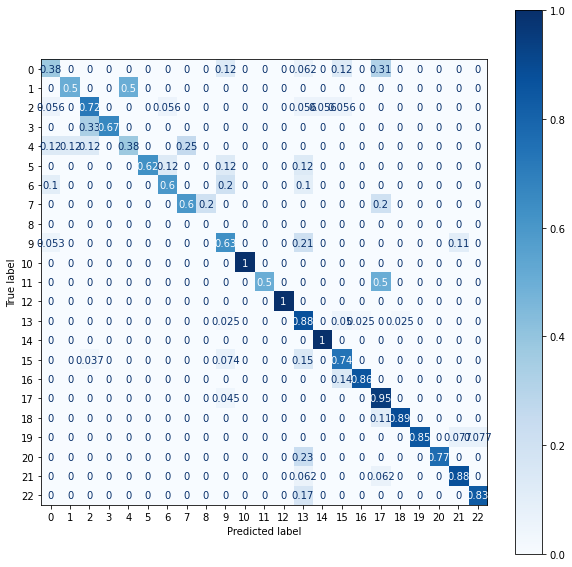

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(nbclassifier, X_test, y_test, cmap=plt.cm.Blues,normalize='true',ax=ax)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46        16
           1       0.67      0.50      0.57         4
           2       0.81      0.72      0.76        18
           3       1.00      0.67      0.80         3
           4       0.60      0.38      0.46         8
           5       1.00      0.62      0.77         8
           6       0.75      0.60      0.67        10
           7       0.60      0.60      0.60         5
           8       0.00      0.00      0.00         0
           9       0.57      0.63      0.60        19
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         1
          13       0.67      0.88      0.76        40
          14       0.50      1.00      0.67         1
          15       0.77      0.74      0.75        27
          16       0.86      0.86      0.86         7
          17       0.70    

C:\Users\miken\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miken\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miken\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='micro'))
print("Recall:",metrics.recall_score(y_test,y_pred, average='micro'))

Accuracy: 0.748
Precision: 0.748
Recall: 0.748


In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score
# use k-fold cross validation to evaluate the naive bayes model
# set K=10, use 'accuracy' as the scoring parameter
scores = cross_val_score(nbclassifier, X_train, y_train, cv = 10, scoring='accuracy')

print("cross validation scores:", scores)

print("mean of cross validation scores:", scores.mean())

cross validation scores: [0.76 0.72 0.76 0.7  0.76 0.75 0.77 0.75 0.77 0.8 ]
mean of cross validation scores: 0.754


In [ ]:
n_features = 100

accuracy_scores = []

for i in range(25):
    vectorizer = TfidfVectorizer(analyzer='word', max_features=n_features*(i+1), stop_words='english')
    X = vectorizer.fit_transform(gjs['JD'])
    X = X.toarray()
    tfidf_df = pd.DataFrame(X)
    tfidf_df['label'] = gjs['Category']

    # fit the data to naive bayes model
    nbclassifier.fit(X, tfidf_df['label'])

    # split dataset into train and test subsets
    train_df, test_df = train_test_split(tfidf_df, test_size=0.2)

    # set variables and response for the training set
    X_train = train_df.iloc[:,:(tfidf_df.shape[1]-1)]
    y_train = train_df['label']

    # set variables and response for the testing set
    X_test = test_df.iloc[:,:(tfidf_df.shape[1]-1)]
    y_test = test_df["label"]

    nbclassifier.fit(X_train, y_train)
    y_pred = nbclassifier.predict(X_test)
    
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))
    print("Accuracy (features=", n_features*(i+1), "): ", metrics.accuracy_score(y_test, y_pred))

Accuracy (features= 100 ):  0.428
Accuracy (features= 200 ):  0.528
Accuracy (features= 300 ):  0.548
Accuracy (features= 400 ):  0.62
Accuracy (features= 500 ):  0.7
Accuracy (features= 600 ):  0.692
Accuracy (features= 700 ):  0.772
Accuracy (features= 800 ):  0.696
Accuracy (features= 900 ):  0.716
Accuracy (features= 1000 ):  0.732
Accuracy (features= 1100 ):  0.716
Accuracy (features= 1200 ):  0.736
Accuracy (features= 1300 ):  0.788
Accuracy (features= 1400 ):  0.74
Accuracy (features= 1500 ):  0.744
Accuracy (features= 1600 ):  0.732
Accuracy (features= 1700 ):  0.744
Accuracy (features= 1800 ):  0.736
Accuracy (features= 1900 ):  0.728
Accuracy (features= 2000 ):  0.792
Accuracy (features= 2100 ):  0.744
Accuracy (features= 2200 ):  0.732
Accuracy (features= 2300 ):  0.752
Accuracy (features= 2400 ):  0.696
Accuracy (features= 2500 ):  0.728


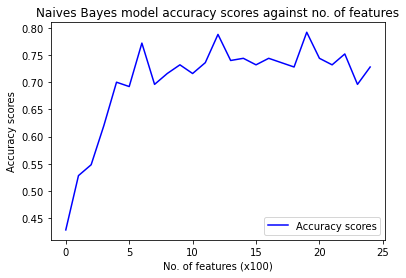

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure()
plt.plot(accuracy_scores, color='b', label='Accuracy scores')
plt.legend(loc="best")
plt.xlabel('No. of features (x100)')
plt.ylabel('Accuracy scores')
plt.title('Naives Bayes model accuracy scores against no. of features')

plt.show()